In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from dataset import EarthSystemsDataset

In [2]:
data_var_names = ['global_temp', 'elec_fossil', 'elec_clean', 'co2', 'ch4', 'petroleum']
y_vals = ['temp_change']
lags = 15

earth_data = EarthSystemsDataset(data_var_names, y_vals=y_vals, val_frac=0.1, lags=lags, mode='ann')
earth_data.full_mode()
# earth_data.data['index'] = list(range(earth_data.data.shape[0]))
data = earth_data.data

In [3]:
data

temp_change  elec_fossil  elec_clean  co2_average  ch4_average  \
year month                                                                   
1983 Jul           0.18     4.325726    0.345359       342.14      1625.94   
     Aug           0.35     4.710642    0.338025       340.62      1628.06   
     Sep           0.37     4.546845    0.315758       340.53      1638.44   
     Oct           0.17     4.699021    0.320524       341.75      1644.79   
     Nov           0.30     4.574850    0.325785       342.83      1642.60   
...                 ...          ...         ...          ...          ...   
2023 May           0.94     7.244133    0.740660       420.56      1920.00   
     Jun           1.08     7.063367    0.691709       419.57      1915.94   
     Jul           1.19     7.253938    0.711895       417.85      1914.56   
     Aug           1.19     7.397303    0.711962       416.59      1919.15   
     Sep           1.48     7.202198    0.666253       416.99      1927.35   

               petroleum  
year month                
1983 Jul     8636.032000  
     Aug     8679.129000  
     Sep     8784.333000  
     Oct     8770.645000  
     Nov     8770.367000  
...                  ...  
2023 May    80846.269332  
     Jun    81759.208221  
     Jul    81006.724819  
     Aug    80639.447798  
     Sep    81554.209233  

[483 rows x 6 columns]

In [4]:
standardized_data = stats.zscore(data)
standardized_data = standardized_data.reset_index()
standardized_data = standardized_data.drop(columns = ['year', 'month'])
standardized_data.columns = ['Mean Temperature Change', 'Electricity Generation (Fossil Fuels)',
                             'Electricity Generation (Clean)', 'Carbon Dioxide (C02) Levels',
                             'Methane (CH4) Levels',  'Petroleum Production']

In [5]:
data.index[0]

(1983, 'Jul')

In [6]:
len(data)//2

241

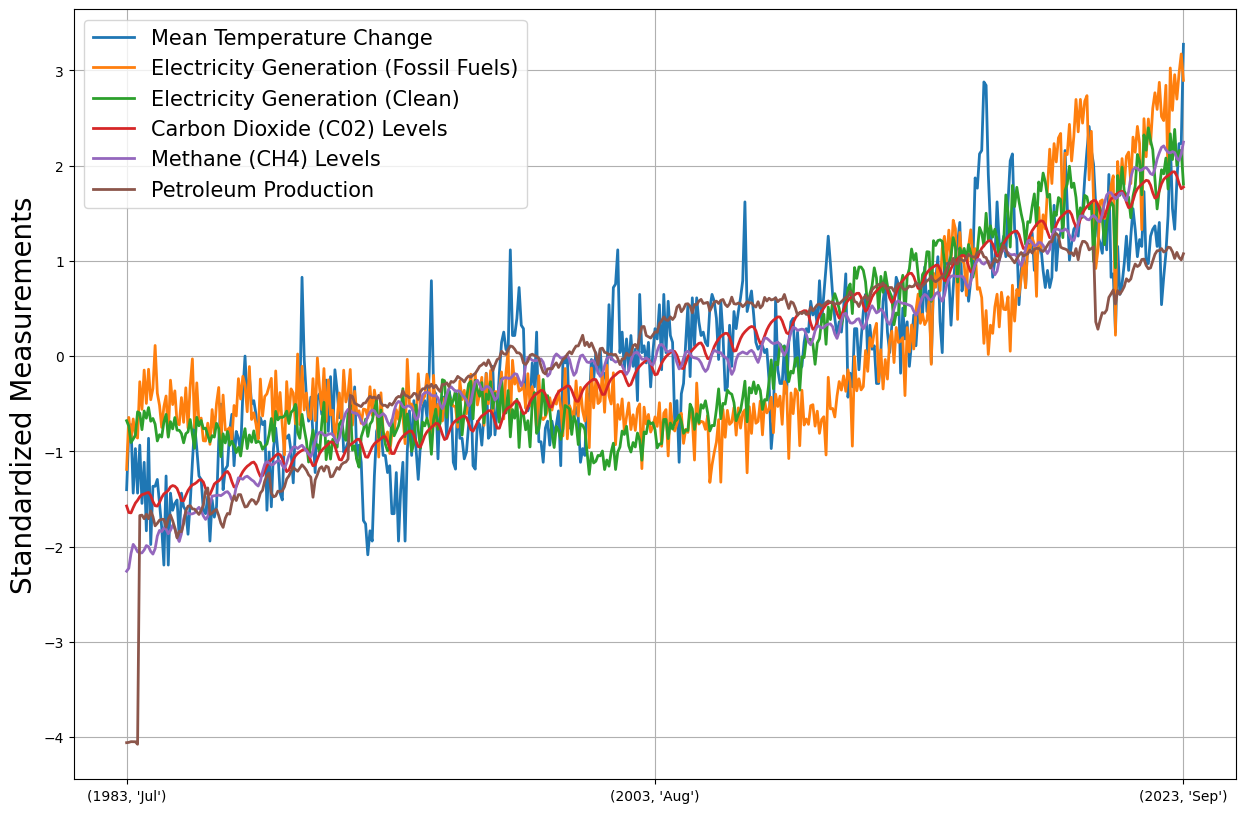

In [7]:
plt.figure(figsize = (15,10))
plt.plot(standardized_data, alpha = 1, linewidth = 2)
plt.legend(standardized_data.columns, fontsize = 15)
plt.grid()

plt.ylabel('Standardized Measurements', fontsize = 20)

plt.xticks([0, len(data)//2 ,len(data)-1], (data.index[0], data.index[len(data)//2], data.index[len(data)-1]))

plt.show()

<Figure size 432x288 with 0 Axes>

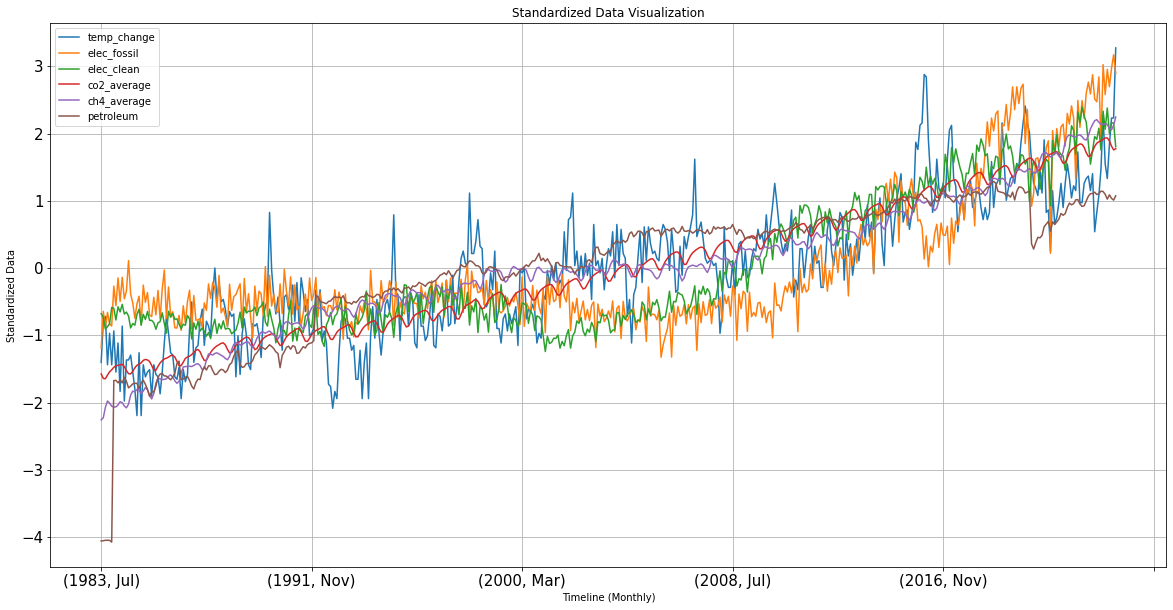

In [48]:
plt.figure()

standardized_data.plot(figsize = (20,10),
                      title = "Standardized Data Visualization",
                      grid = True,
                      xlabel = "Timeline (Monthly)",
                      ylabel = "Standardized Data",
                      fontsize = 15)
plt.show()

<Axes: xlabel='year,month'>

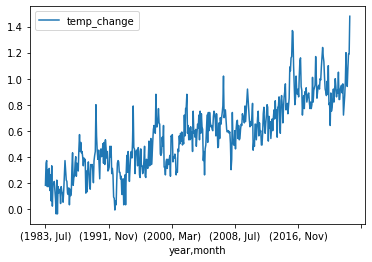

In [34]:
data.plot(y= ['temp_change'])